In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


import scipy
import math
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\PYTHON\EDA dataset\STATS DECISION\REGRESSION\multi linear regression\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


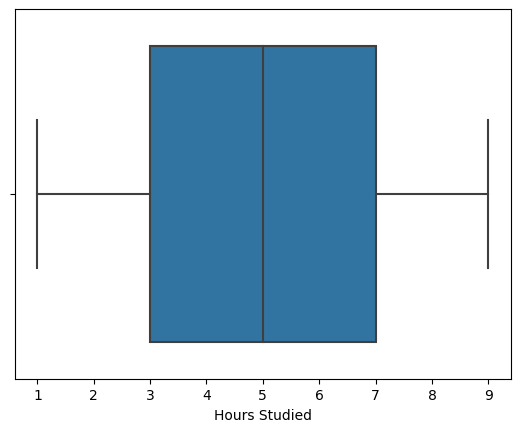

<Figure size 500x500 with 0 Axes>

In [17]:
sns.boxplot(x= df["Hours Studied"])
plt.figure(figsize = [5,5])
plt.show()

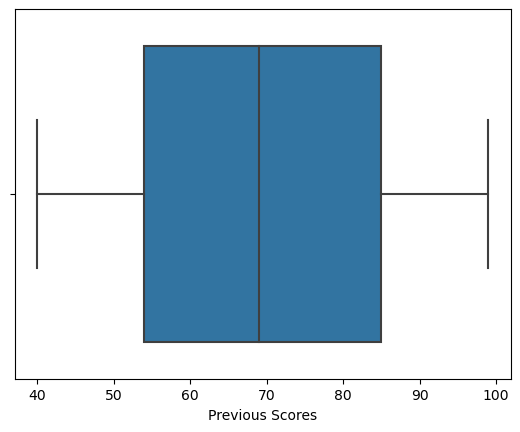

<Figure size 500x500 with 0 Axes>

In [18]:
sns.boxplot(x= df["Previous Scores"])
plt.figure(figsize = [5,5])
plt.show()

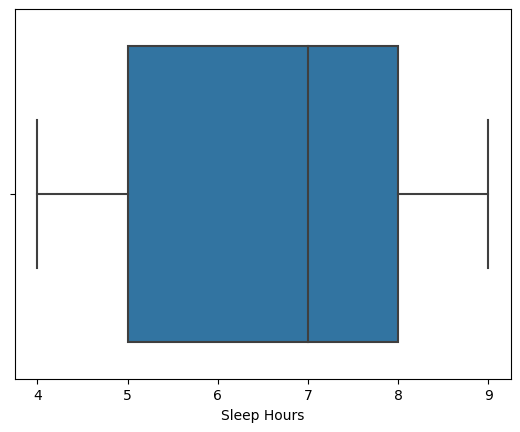

<Figure size 500x500 with 0 Axes>

In [19]:
sns.boxplot(x= df["Sleep Hours"])
plt.figure(figsize = [5,5])
plt.show()

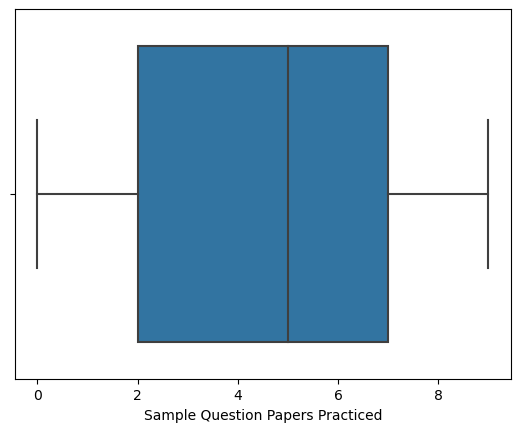

<Figure size 500x500 with 0 Axes>

In [20]:
sns.boxplot(x= df["Sample Question Papers Practiced"])
plt.figure(figsize = [5,5])
plt.show()

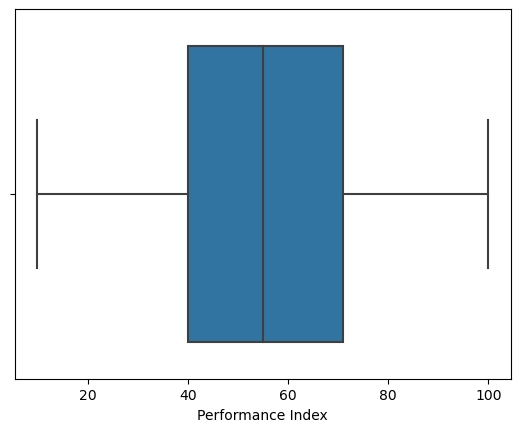

<Figure size 500x500 with 0 Axes>

In [21]:
sns.boxplot(x= df["Performance Index"])
plt.figure(figsize = [5,5])
plt.show()

In [11]:
cor = (df[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced","Performance Index"]]).corr()
cor

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<Axes: >

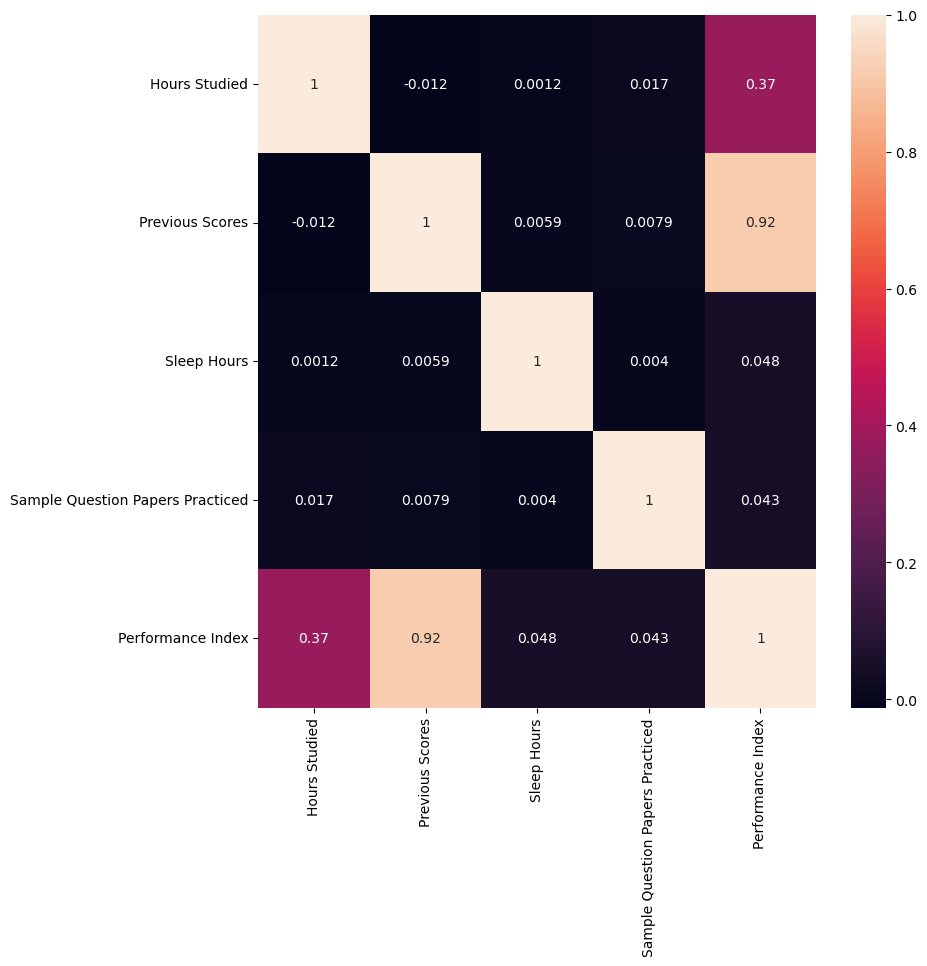

In [12]:
plt.figure(figsize= (9,9))
sns.heatmap(cor,annot =True)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le =LabelEncoder()
df["Extracurricular Activities"]=le.fit_transform(df["Extracurricular Activities"])

In [28]:
df['Extracurricular Activities'].value_counts()

0    5052
1    4948
Name: Extracurricular Activities, dtype: int64

In [29]:
y = df["Performance Index"]
X = df.drop("Performance Index",axis =1)

In [30]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred =model.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error ,r2_score

mse = mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)

print('MSE : ',mse)
print('R2 Score: ',r2)

MSE :  4.105609215835832
R2 Score:  0.9880686410711422


In [34]:
print("Intercept : ",model.intercept_)
print(" Coeff : ",model.coef_)

Intercept :  -34.0752082252134
 Coeff :  [2.85191442 1.01886667 0.66530347 0.47682996 0.18776637]


In [35]:
## Elimination

In [36]:
import statsmodels.api as smf

In [37]:
ols_model =smf.OLS(endog =y,exog =X).fit()

In [38]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.991e+05
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        11:52:20   Log-Likelihood:                         -31819.
No. Observations:               10000   AIC:                                  6.365e+04
Df Residuals:                    9995   BIC:                                  6.368e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Hours Studied                        2.1960      0.021    102.578      0.000       2.154       2.238
Previous Scores                      0.8172      0.003    315.815      0.000       0.812       0.822
Extracurricular Activities          -1.1709      0.115    -10.171      0.000      -1.397      -0.945
Sleep Hours                         -1.5036      0.027    -55.479      0.000      -1.557      -1.450
Sample Question Papers Practiced    -0.2656      0.020    -13.455      0.000      -0.304      -0.227
==============================================================================
Omnibus:                       45.733   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.682
Skew:                           0.002   Prob(JB):                     4.85e-08
Kurtosis:                       2.716   Cond. No.                         143.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_ols = X

In [42]:
X_ols = X_ols.drop("Previous Scores",axis =1)

In [43]:
ols_model =smf.OLS(endog =y,exog =X_ols).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                          2.040e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        12:13:10   Log-Likelihood:                         -43799.
No. Observations:               10000   AIC:                                  8.761e+04
Df Residuals:                    9996   BIC:                                  8.764e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Hours Studied                        3.9186      0.069     57.131      0.000       3.784       4.053
Extracurricular Activities           4.2265      0.377     11.205      0.000       3.487       4.966
Sleep Hours                          4.1362      0.068     61.234      0.000       4.004       4.269
Sample Question Papers Practiced     1.0868      0.064     17.019      0.000       0.962       1.212
==============================================================================
Omnibus:                     1179.218   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.184
Skew:                          -0.013   Prob(JB):                     3.62e-69
Kurtosis:                       2.131   Cond. No.                         19.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""